# Defining the Question

### a) Specifying the Question

Build a model that determines whether or not a patient's symptoms indicate that they have hypothyroid.

### b) Defining the Metric for Success

Creating a model that can successfully predict whether a patient's symptoms indicate that they have hypothyroid or not.

### c) Understanding the context 

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

The thyroid is an organ located in the human neck below the Adam's apple. The main purpose of thyroid is to produce thyroid hormones. The produced hormones go through the bloodstream to all the other organs which help to control metabolism and growth development in both adults and children.
The thyroid gland acts as an important part in breathing, blood circulation, bowel movements, temperature of the body, muscle control, digestion, and brain function. An issue with the thyroid gland can result in problems all over the human body. 

The main job of the thyroid gland is to make the hormone thyroxine, also known as T4 because it has four iodine molecules. The thyroid also makes the hormone triiodothyronine, known as T3 because it has three iodine molecules, but in smaller amounts. The thyroid gland makes mostly T4, and the T4 has to be converted to T3, because T3 is the part of thyroxine that actually does the work.

The pituitary gland at the base of the brain controls hormone production in your body. It makes thyroid-stimulating hormone (TSH), which tells the thyroid gland how much T4 and T3 to produce. The TSH level in your blood reveals how much T4 your pituitary gland is asking your thyroid gland to make.

Thyroid diseases are widespread worldwide. Two of the most common thyroid disorders among the oublic are hyperthyroidism and hypothyroidism. 

**Hyperthyroid**-Increase in the hormone production can cause hyperthyroidism. In medical field, “hyper” indicates too
much. Hyperthyroidism crop up when the gland
produces excess hormones

**Hypothyroid**-Decrease in the hormone production can cause hypothyroidism.
In medical field, the term hypo means
deficient or not enough.

For this analysis, we will focus on Hypothyroid. The symptoms of hypothyroid include: Lethargy, reduced heart rate, increased cold sensitivity, numbness
in hands, enlargement in the neck, dry skin and hair,heavy menstrual periods and constipation. 

Hypothyroidism can be diagnosed with thyroid function tests, which measures the levels of Thyroid-Stimulating Hormones
(TSH) in bloodstream of human body. These tests include The T4 test and the TSH test which are the two most common thyroid function tests. They’re usually ordered together. 

A normal range for TSH in most laboratories is 0.4 milliunits per liter (mU/L) to 4.0 mU/L. If your TSH is higher than 4.0 mU/L on repeat tests, you probably have hypothyroidism.

The dataset provided can be found here http://bit.ly/hypothyroid_data 

It contains information about thyroid patients including their age, sex, if they are sick or not, if they have goitre or not, if there is presence of tumors in their bodies or not and their various TSH, T3 and T4 levels including if these hormone levels were measured or not among other features. We will use the inofrmation provided to create a model that can predict if a patient has hypothyroid or not taking into account the features and symptoms provided. 

Fro more info on this, follow the links below:

https://core.ac.uk/download/pdf/231152246.pdf.

https://www.everydayhealth.com/hs/healthy-living-with-hypothyroidism/understanding-test-results/#:~:text=A%20normal%20range%20for%20TSH,t%20get%20into%20your%20cells. 

https://www.everydayhealth.com/hs/healthy-living-with-hypothyroidism/understanding-test-results/#:~:text=A%20normal%20range%20for%20TSH,t%20get%20into%20your%20cells.

### d) Recording the Experimental Design

1. Defining the Question
2. Reading the Data.
3. Checking the Data.
4. Data Cleaning
5. Performing EDA
6. Building Prediction Models
7. Evaluation of the solution
8. Challenging the solution 
9. Conclusion

### e) Data Relevance

This will be discussed after the analysis and prediction has been completed

# Data Preparation

### Importing our Libraries

In [ ]:
# installing the necessary libraries not in google colab
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [ ]:
# Let us first import all the libraries we will need for our analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
import math
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [ ]:
# let us set the warnings that may appear in our analysis off

import warnings
warnings.filterwarnings('ignore') 

# subsequently let us set the pandas warning for chained assignments off
pd.options.mode.chained_assignment = None  # default='warn'

### Loading and Previewing our Dataset

In [ ]:
# Loading the Dataset from the source i.e. csv
df = pd.read_csv('/content/hypothyroid.csv')
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


## Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
print('This hypothyroid dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')

This hypothyroid dataset has 3163 rows, and 26 columns


In [ ]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [ ]:
# checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [ ]:
# let us see the columns in our dataframe
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
# Checking the entire profile of the dataframe

profile = ProfileReport(df, title="Hypothyroid Profile Report", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# let us save our profile report
profile.to_file(output_file="Hypothyroid_Profile_Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# let us see the unique values of all our columns
#for col in df:
 #   print(df[col].unique())
 #df.describe(include='all').loc['unique', :]
for col in list(df):
    print(col)
    print(df[col].unique())

status
['hypothyroid' 'negative']
age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
sex
['M' 'F' '?']
on_thyroxine
['f' 't']
query_on_thyroxine
['f' 't']
on_antithyroid_medication
['f' 't']
thyroid_surgery
['f' 't']
query_hypothyroid
['f' 't']
query_hyperthyroid
['f' 't']
pregnant
['f' 't']
sick
['f' 't']
tumor
['f' 't']
lithium
['f' 't']
goitre
['f' 't']
TSH_measured
['y' 'n']
TSH
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '1

# Data Cleaning

In [ ]:
# let us make a copy of our dataset to clean and do modelling on
df_copy = df.copy(deep = True)

In [ ]:
# For consistency, the column names should be uniform
# Let us change all column names to lower case
#
df_copy.columns = df_copy.columns.str.lower()
# Previewing the columns to confirm whether the changes have taken effect
#
df_copy.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [ ]:
# From our profile report, we can see that we have any duplicated rows
# But let us check 
df_copy.duplicated().sum()

77

In [ ]:
# let us see these duplicated rows
df_copy[df_copy.duplicated()]
# we will not drop the duplicated columns as they have different data in most of the columns

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


In [ ]:
#We now replace '?' values in dataset with NaN values so that it becomes easy to count them
df_copy.replace(to_replace='?', inplace=True, value=np.NaN)

In [ ]:
# Let Us Drop the TBG column since it is mostly null values and the TBG measures

df_copy.drop(['tbg', 'tbg_measured'], axis = 1, inplace = True)

# let us confirm that we have dropped the unnecessary columns
df_copy.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44


In [ ]:
# let us fix the datatypes in our dataframe
categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'tsh_measured', 't3_measured', 
                       'tt4_measured', 't4U_measured', 'fti_measured']

# Numerical columns array 
numerical_columns = ['age','tsh','t3', 'tt4', 't4u', 'fti']


# Using a conditional for loop to convert each columns into the right data types

for column in df_copy.columns:
  if column in numerical_columns:
    df_copy[column] = pd.to_numeric(df_copy[column])
  else:
    df_copy[column] = df_copy[column].astype('category')

# Confirming changes
df_copy.dtypes
# The data types have now been set correctly

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
tsh_measured                 category
tsh                           float64
t3_measured                  category
t3                            float64
tt4_measured                 category
tt4                           float64
t4u_measured                 category
t4u                           float64
fti_measured                 category
fti                           float64
dtype: object

In [ ]:
# let us check for missng values in our dataframe
df_copy.isnull().sum()

status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
tsh_measured                   0
tsh                          468
t3_measured                    0
t3                           695
tt4_measured                   0
tt4                          249
t4u_measured                   0
t4u                          248
fti_measured                   0
fti                          247
dtype: int64

In [ ]:
# let us see how much information we lose by dropping the null values
df_clean = df_copy.dropna()
print('Shape of dataframe with no missing values: ', df_clean.shape)
print('Shape of dataframe with missing values: ', df_copy.shape)
# by dropping our null values we have dropped 1000 rows of our dataframe
# this is a huge part of our dataset which is not ideal
# therefore we will need to impute our missing values

Shape of dataframe with no missing values:  (2000, 24)
Shape of dataframe with missing values:  (3163, 24)


In [ ]:
# List of columns containing null values
df_copy.columns[df_copy.isnull().any()].tolist()

['age', 'sex', 'tsh', 't3', 'tt4', 't4u', 'fti']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ba0658b90>,
      dtype=object)

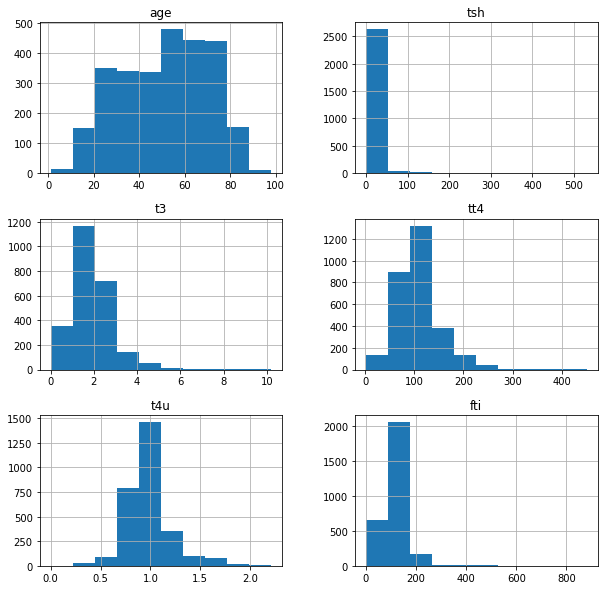

In [ ]:
# to see the appropriate way to impute missing values 
# let us plot histograms to visualize patterns in the data
df_copy.hist(figsize = (10,10))

In [ ]:
# The features "age" and "t4u" show a normal distribution, 
# which is why we will be replacing the missing values with mean.
df_copy['age'].fillna(df_copy['age'].mean(), inplace = True)
df_copy['t4u'].fillna(df_copy['t4u'].mean(), inplace = True)

#The features "TSH", "T3", "TT4" and "FTI" show a skewed distribution,
#for continuous data, the use of the median is better than mean since it is not influenced by outliers
#which is why we will be replacing the missing values with median.
df_copy['tsh'].fillna(df_copy['tsh'].mean(), inplace = True)
df_copy['t3'].fillna(df_copy['t3'].median(), inplace = True)
df_copy['tt4'].fillna(df_copy['tt4'].median(), inplace = True)
df_copy['fti'].fillna(df_copy['fti'].median(), inplace = True)

#The feature "gender" is catgorical and contains imbalanced data 
#with the values "f" much greater then "m". 
#for categorical data using mode makes more sense 
#So we will be replacing the missing values with "f".

df_copy['sex'].fillna('F', inplace = True)

# let us see if we have successfully filled all missing values
df_copy.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
dtype: int64

# Exploratory data Analysis

### Univariate Analysis

In [ ]:
# finding the information about the variables
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3163 non-null   category
 1   age                        3163 non-null   float64 
 2   sex                        3163 non-null   category
 3   on_thyroxine               3163 non-null   category
 4   query_on_thyroxine         3163 non-null   category
 5   on_antithyroid_medication  3163 non-null   category
 6   thyroid_surgery            3163 non-null   category
 7   query_hypothyroid          3163 non-null   category
 8   query_hyperthyroid         3163 non-null   category
 9   pregnant                   3163 non-null   category
 10  sick                       3163 non-null   category
 11  tumor                      3163 non-null   category
 12  lithium                    3163 non-null   category
 13  goitre                     3163 n

Text(0.5, 1.0, 'Checking for outliers using boxplots')

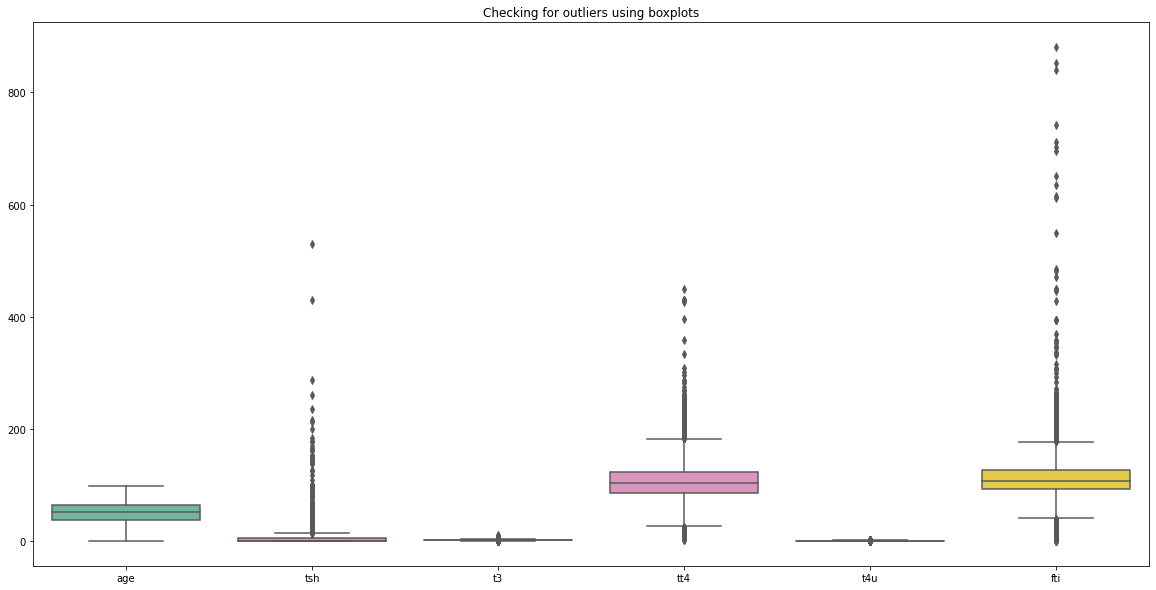

In [ ]:
# Boxplots to Visualize outliers of our numerical columns 
plt.figure(figsize = (20,10))
ax = sns.boxplot(data=df_copy, orient="v", palette="Set2")
plt.title('Checking for outliers using boxplots')
# The boxplots below indicate the  outliers in each of the numerical columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ba4df21d0>,
      dtype=object)

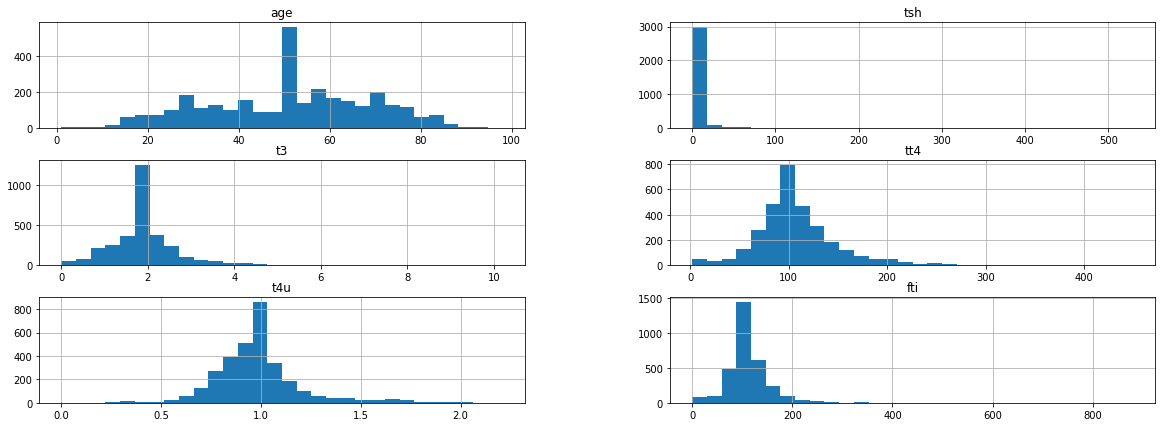

In [ ]:
# let us check the distributions of our data
# 
df_copy.hist(bins=30, figsize=(20, 7))

# age and t4u features are normally distributed
# tsh, t3, tt4 and fti are skewed to the righ 
# meaning that the mean is greater than the mode 

In [ ]:
# let us use the measures of central tendency to prove the skewness of the
# histograms above
# tsh
print('The mean of tsh column is', df_copy["tsh"].mean())
print('The mode of tsh column is', df_copy["tsh"].mode())
# t3
print('The mean of t3 column is', df_copy["t3"].mean())
print('The mode of t3 column is', df_copy["t3"].mode())
# tt4
print('The mean of tt4 column is', df_copy["tt4"].mean())
print('The mode of tt4 column is', df_copy["tt4"].mode())
# fti
print('The mean of fti column is', df_copy["fti"].mean())
print('The mode of fti column is', df_copy["fti"].mode())

# in all column instances mentioned above, the mean is greater than the mode,
# which justifies the right skewness of our histograms above 

The mean of tsh column is 5.923179962894245
The mode of tsh column is 0    0.0
dtype: float64
The mean of t3 column is 1.9090420486879804
The mode of t3 column is 0    1.8
dtype: float64
The mean of tt4 column is 108.4681947518179
The mode of tt4 column is 0    104.0
dtype: float64
The mean of fti column is 114.74198545684477
The mode of fti column is 0    107.0
dtype: float64


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

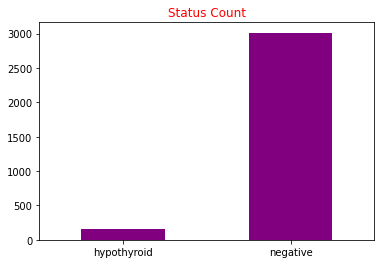

In [ ]:
# Bar graph showing status count of patients in our dataframe 

df_copy.status.value_counts().sort_values().plot.bar(color='Purple')
plt.title('Status Count', color='red')
degrees = 0
plt.xticks(rotation=degrees)

# from this we can see that most patients do not have hypothyroid

Text(0.5, 1.0, 'Gender Count')

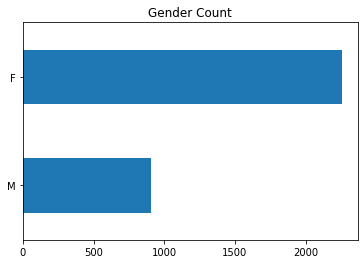

In [ ]:
# Bar graph showing count of males and females in our dataframe 
df_copy.sex.value_counts().sort_values().plot.barh()
plt.title('Gender Count')
# from our bargraph, we can see that most of the patients are female

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

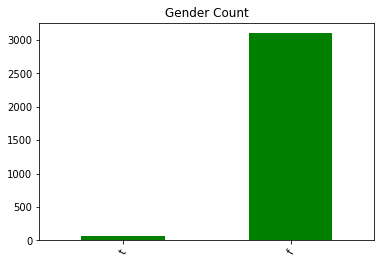

In [ ]:
# Bar graph showing count of pregnant women in our dataframe 
df_copy.pregnant.value_counts().sort_values().plot.bar(color='green')
plt.title('Gender Count')
degrees = 60
plt.xticks(rotation=degrees)
# from the graph we can see that a high number of the patients are not pregnant

Text(0.5, 1.0, 'A Pie chart of Sick Patients')

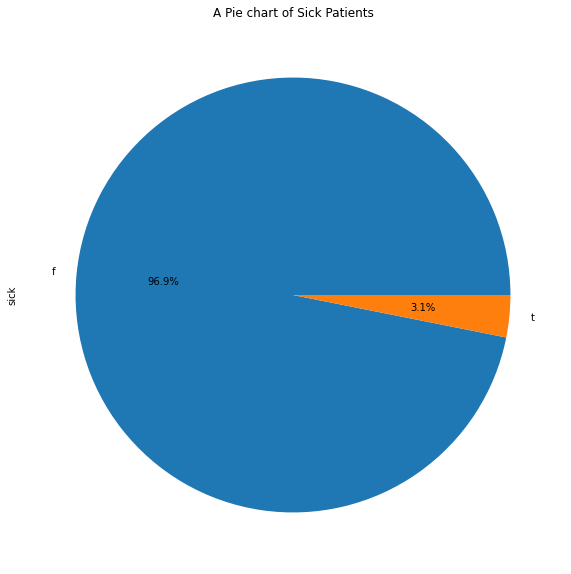

In [ ]:
# pie chart visualizing sick patients
df_copy.sick.value_counts().plot(kind= 'pie', figsize=[10,10], autopct = '%1.1f%%')
plt.title('A Pie chart of Sick Patients') 
# from the pie chart, we can see that a great percentage of patients are classified as not being sick

Text(0.5, 1.0, 'Count of patients with tumors')

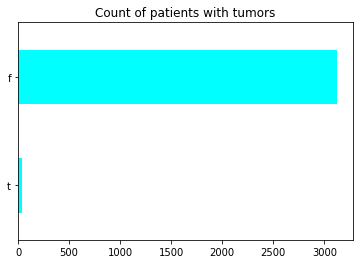

In [ ]:
# Bar graph showing count of patients with tumors in our dataframe 
df_copy.tumor.value_counts().sort_values().plot.barh(color='cyan')
plt.title('Count of patients with tumors')

# from the graph we can see that a high number of the patients do not have tumors

# Bivariate Analysis

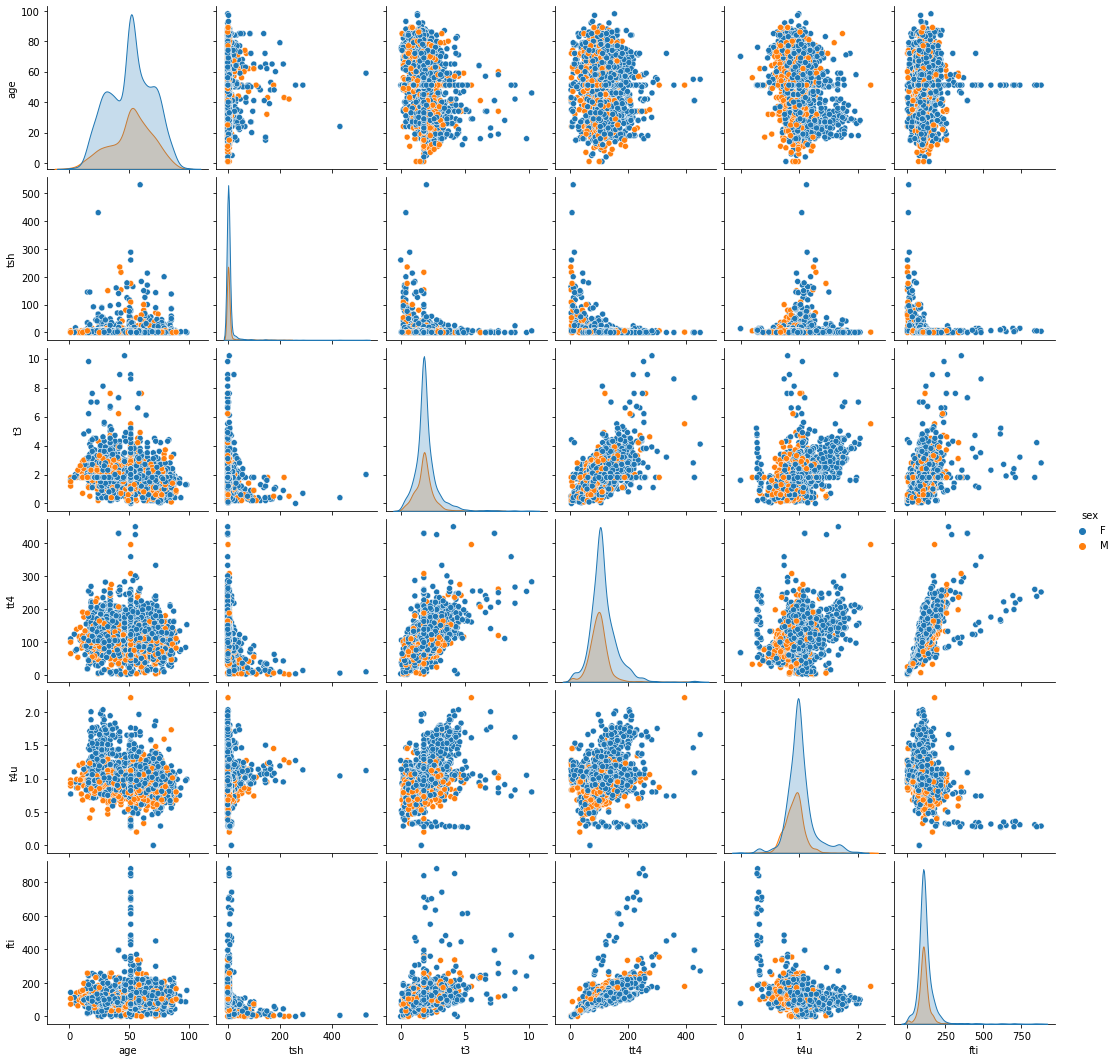

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df_copy, hue="sex")
plt.show()

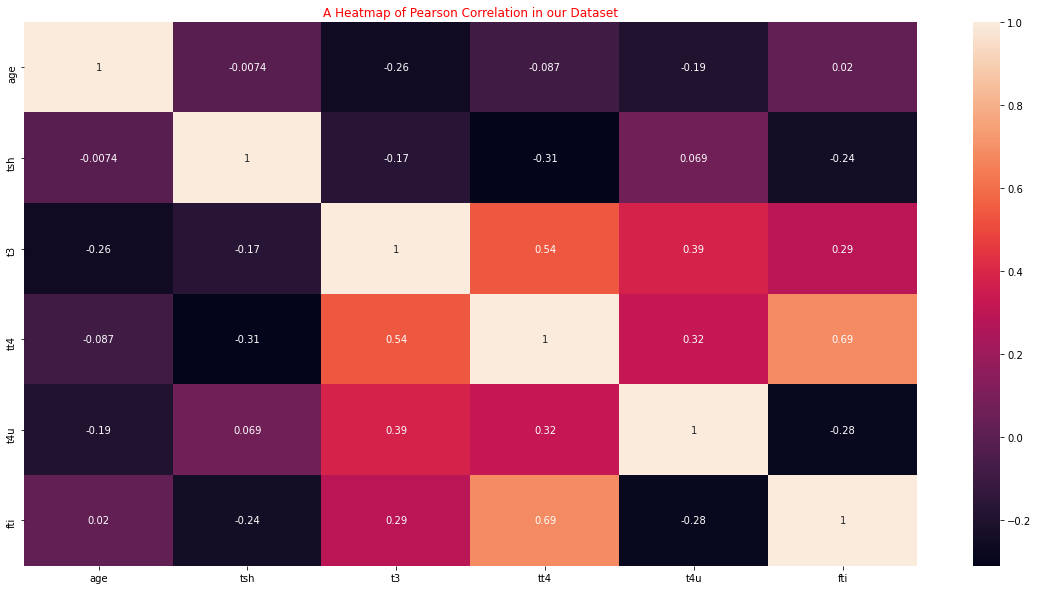

In [ ]:
# Calculating the pearson coefficient correlation
a = df_copy.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()
# From this we can see there is a correlation between t3 and tt4.

### EDA Conclusion

From the EDA performed above we can conclude that:

1. Age and t4u features are normally distributed while tsh, t3, tt4 and fti are skewed to the right meaning that the mean is greater than the mode. 
2. Most of the patients are female
3. Most of the female patients are not pregnant
4. Most of the patients did not register sick as one of their symptoms
5. Most of the patients do not have tumors
6. There is a significant positive correlation between t3 and tt4 features.
7. There is a significant positive relationship between tt4 and fti features.
8. There is also a positive relationship between t3 and t4u and fti features.

# Prediction Models

### Data Pre-Processing

In [ ]:
# label encoding of categorical data
#
df_copy = df_copy.replace({"t":1,"f":0, "y":1, "n":0, "hypothyroid":1, "negative":0, "F":1, "M":0})
# let us preview our dataset to ensure the changes have taken effect
df_copy.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0


In [ ]:
# let us viwe the data types of our dataframe to make sure they are all numerical now
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   int64  
 1   age                        3163 non-null   float64
 2   sex                        3163 non-null   int64  
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

Before we begin our modelling process, let us define the performance metrics we will use to evaluate how good our models are.

Precision: It is implied as the measure of the correctly identified positive cases from all the predicted positive cases. Thus, it is useful when the costs of False Positives is high

Recall: It is the measure of the correctly identified positive cases from all the actual positive cases. It is important when the cost of False Negatives is high.

Accuracy: One of the more obvious metrics, it is the measure of all the correctly identified cases. It is most used when all the classes are equally important.

F1-score: This is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric.

For this analysis, we will focus on F1score since it is a better metric to evaluate our models on.

NB: In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.

NB: Test accuracy should not be higher than train since the model is optimized for the latter. We will test both train and test data to make sure this remains true.

# Random Forest Classifier

### Random Forest

In [ ]:
# Split the independent and dependent variables
X = df_copy.drop('status', axis =1)
y = df_copy.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Instantiating the model
forest = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                min_samples_split = 10, max_depth=5)
forest.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred = forest.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'The accuracy score for our test dataset is: {accuracy_score(y_test, y_pred)}')
print(f'The f1 score for our test dataset is {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = forest.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The accuracy score for our train dataset is: {accuracy_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))

The accuracy score for our test dataset is: 0.982086406743941
The f1 score for our test dataset is 0.7536231884057971
[[906   4]
 [ 13  26]]


The accuracy score for our train dataset is: 0.9905149051490515
The f1 score for our train dataset is 0.900473933649289
[[2098    4]
 [  17   95]]


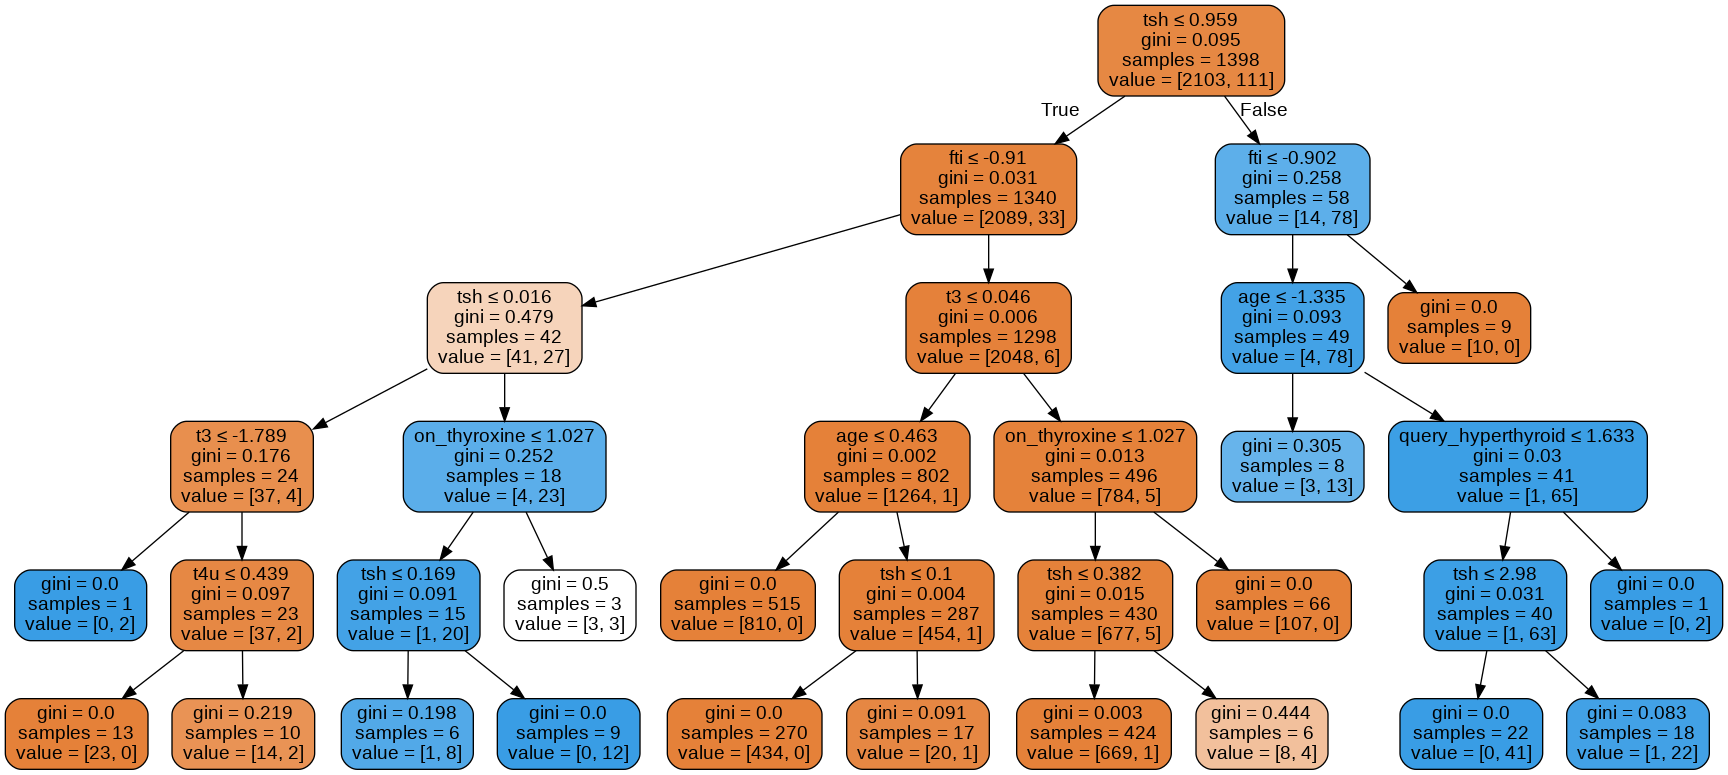

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest to visualize
tree = forest.estimators_[40]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

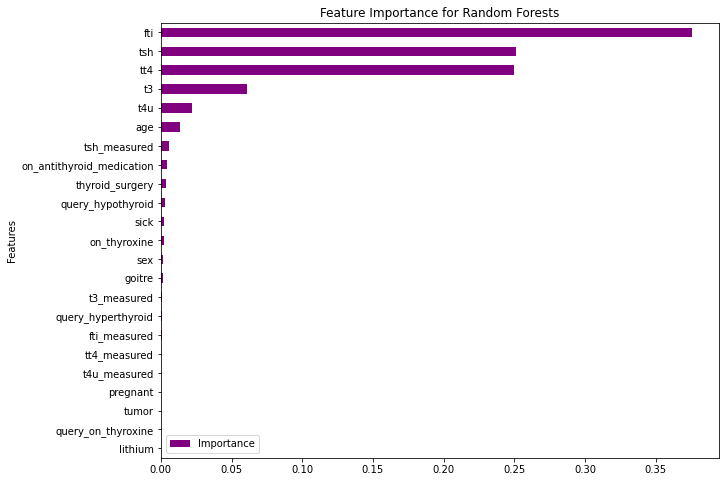

In [ ]:
# Getting the feature importance
# Creating a dataframe of features and their respective importances
# plotting a bar graph to visualize the important features of our random forest
pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = True).set_index('Features')\
.plot.barh(title = 'Feature Importance for Random Forests',figsize = (10, 8), color = 'purple')
plt.show()

In [ ]:
# let us see the 10 most important features of or dataframe
pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features').head(10)

,Importance
Features,
fti,0.375820
tsh,0.251484
tt4,0.249741
t3,0.060745
t4u,0.021839
age,0.013740
tsh_measured,0.005555
on_antithyroid_medication,0.004580
thyroid_surgery,0.003903


### Remodelling with Most Important features

In [ ]:
# let us do some remodelling with the top 10 important features to see if our f1 score will improve
X = df_copy[['fti', 'tsh', 'tt4', 't3','t4u', 
             'age', 'tsh_measured', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid']]
y = df_copy.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Instantiating the model
forest = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                min_samples_split = 10, max_depth=5)
forest.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred = forest.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'The accuracy score for our test dataset is: {accuracy_score(y_test, y_pred)}')
print(f'The f1 score for our test dataset is {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = forest.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The accuracy score for our train dataset is: {accuracy_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))

The accuracy score for our test dataset is: 0.9884088514225501
The f1 score for our test dataset is 0.8607594936708861
[[904   6]
 [  5  34]]


The accuracy score for our train dataset is: 0.9950316169828365
The f1 score for our train dataset is 0.9511111111111111
[[2096    6]
 [   5  107]]


In [ ]:
# using 10 of the most important features highlihted by the random forest
# has resulted in a significant increase of our f1 score

### Hyperparameter Tuning 

In [ ]:
# let us see what our optimal parameters for our random forest are

In [ ]:
# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
#We will try adjusting the following set of hyperparameters:
#n_estimators = number of trees in the foreset
#max_depth = max number of levels in each decision tree
#min_samples_split = min number of data points placed in a node before the node is split

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,10,15,20]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)
# Checking for the best parameters
#
print(f'The best parameters are: {rf_random.best_params_}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.2min finished


The best parameters are: {'n_estimators': 670, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 20}


In [ ]:
# Applying the best parameters to the model
# Selecting only important features and the y variable
X = df_copy[['fti', 'tsh', 'tt4', 't3','t4u', 
             'age', 'tsh_measured', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid']]
y = df_copy.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Instantiating the model
forest = RandomForestClassifier(n_estimators = 670, random_state = 42,
                                min_samples_split = 10, max_depth=20)
forest.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred = forest.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'The accuracy score for our test dataset is: {accuracy_score(y_test, y_pred)}')
print(f'The f1 score for our test dataset is {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = forest.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The accuracy score for our train dataset is: {accuracy_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))

The accuracy score for our test dataset is: 0.9884088514225501
The f1 score for our test dataset is 0.8607594936708861
[[904   6]
 [  5  34]]


The accuracy score for our train dataset is: 0.9968383017163505
The f1 score for our train dataset is 0.968609865470852
[[2099    3]
 [   4  108]]


In [ ]:
## Applying the best parameters to the model 
#Split the independent and dependent variables
# let us use all the features
X = df_copy.drop('status', axis =1)
y = df_copy.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Instantiating the model
forest = RandomForestClassifier(n_estimators = 670, random_state = 42,
                                min_samples_split = 10, max_depth=20)
forest.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred = forest.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'The accuracy score for our test dataset is: {accuracy_score(y_test, y_pred)}')
print(f'The f1 score for our test dataset is {f1_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = forest.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The accuracy score for our train dataset is: {accuracy_score(y_train, y_pred_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_train)}')
print(confusion_matrix(y_train, y_pred_train))

The accuracy score for our test dataset is: 0.9852476290832455
The f1 score for our test dataset is 0.8157894736842105
[[904   6]
 [  8  31]]


The accuracy score for our train dataset is: 0.996386630532972
The f1 score for our train dataset is 0.9642857142857143
[[2098    4]
 [   4  108]]


Let us compare all the f1 scores of the models we build using random froest classifier:

Our normal random forest classifier:
*   The f1 score for our test dataset is 0.7536
*   The f1 score for our train dataset is 0.9004

Our model with 10 most important features:
*  The f1 score for our test dataset is 0.8607
*  The f1 score for our train dataset is 0.9511

Our model with most important features and using optimal parameters from random search:
*   The f1 score for our test dataset is 0.8607
*   The f1 score for our train dataset is 0.9686

Our model with all features and using optimal parameters from random search:


*   The f1 score for our test dataset is 0.8157
*   The f1 score for our train dataset is 0.9642


# Gradient Boosted Trees

In [ ]:
# Split the independent and dependent variables
# let us use all the features
X = df_copy.drop('status', axis =1)
y = df_copy.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Instantiating the model
gbc = GradientBoostingClassifier(loss='deviance',n_estimators=200, learning_rate=0.01, max_depth=5)
gbc = gbc.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_gbc = gbc.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'The accuracy score for our test dataset is: {accuracy_score(y_test, y_pred_gbc)}')
print(f'The f1 score for our test dataset is {f1_score(y_test, y_pred_gbc)}')
print(confusion_matrix(y_test, y_pred_gbc))

# Making predictions for our train dataset
y_pred_gbc_train = gbc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The accuracy score for our train dataset is: {accuracy_score(y_train, y_pred_gbc_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_gbc_train)}')
print(confusion_matrix(y_train, y_pred_gbc_train))

The accuracy score for our test dataset is: 0.9894625922023182
The f1 score for our test dataset is 0.8837209302325582
[[901   3]
 [  7  38]]


The accuracy score for our train dataset is: 0.9986449864498645
The f1 score for our train dataset is 0.9857819905213271
[[2107    1]
 [   2  104]]


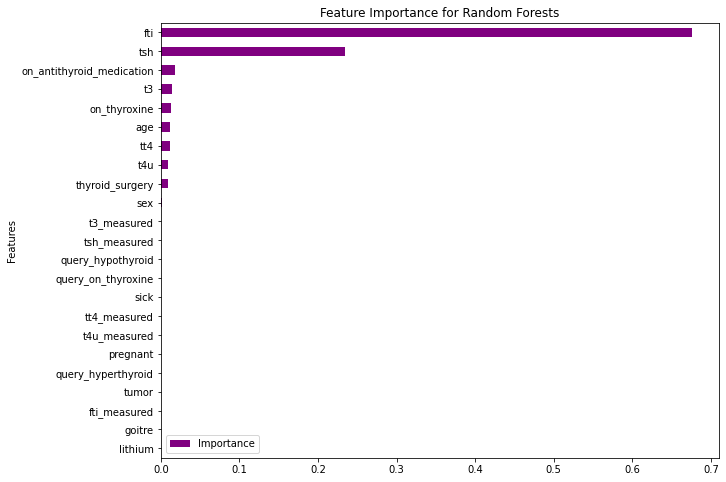

In [ ]:
# Getting the feature importance
# Creating a dataframe of features and their respective importances
# plotting a bar graph to visualize the important features of our random forest
pd.DataFrame({'Features' : X.columns, 'Importance' : gbc.feature_importances_})\
.sort_values(by = 'Importance', ascending = True).set_index('Features')\
.plot.barh(title = 'Feature Importance for Random Forests',figsize = (10, 8), color = 'purple')
plt.show()

In [ ]:
# let us see the 10 most important features of or dataframe
pd.DataFrame({'Features' : X.columns, 'Importance' : gbc.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features').head(10)

,Importance
Features,
fti,0.676340
tsh,0.234862
on_antithyroid_medication,0.017805
t3,0.014403
on_thyroxine,0.013127
age,0.011584
tt4,0.011514
t4u,0.009297
thyroid_surgery,0.008515


### Remodelling using 10 most Important Features

In [ ]:
# let us do some remodelling with the top 10 important features to see if our f1 score will improve
# Split the independent and dependent variables
# let us use 10 of the features
X = df_copy[['fti',	'tsh','on_antithyroid_medication','age','thyroid_surgery',
             't4u','tt4','t3','sex',	'on_thyroxine']]
y = df_copy.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Instantiating the model
gbc = GradientBoostingClassifier(loss='deviance',n_estimators=300, learning_rate=0.1, max_depth=5)
gbc = gbc.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_gbc = gbc.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'The accuracy score for our test dataset is: {accuracy_score(y_test, y_pred_gbc)}')
print(f'The f1 score for our test dataset is {f1_score(y_test, y_pred_gbc)}')
print(confusion_matrix(y_test, y_pred_gbc))

# Making predictions for our train dataset
y_pred_gbc_train = gbc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The accuracy score for our train dataset is: {accuracy_score(y_train, y_pred_gbc_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_gbc_train)}')
print(confusion_matrix(y_train, y_pred_gbc_train))

The accuracy score for our test dataset is: 0.9926238145416227
The f1 score for our test dataset is 0.9213483146067416
[[901   3]
 [  4  41]]


The accuracy score for our train dataset is: 0.9995483288166215
The f1 score for our train dataset is 0.9952606635071091
[[2108    0]
 [   1  105]]


In [ ]:
# using only 10 features yield a more accurate model than using all features

### Hyperparameter Tuning 

In [ ]:
# let us see what our optimal parameters for our random forest are

In [ ]:
# Look at parameters used by our current forest
gradient = GradientBoostingClassifier(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gradient.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
#We will try adjusting the following set of hyperparameters:
#n_estimators = number of trees in the foreset
#max_depth = max number of levels in each decision tree
#min_samples_split = min number of data points placed in a node before the node is split
#learning rate: shrinks the contribution of each tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [5,10,15,20]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# learning rate
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'learning_rate': learning_rate}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
gbc = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gbc_random.fit(X, y)
# Checking for the best parameters
#
print(f'The best parameters are: {gbc_random.best_params_}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.4min finished


The best parameters are: {'n_estimators': 120, 'min_samples_split': 5, 'max_depth': 5, 'learning_rate': 0.5}


In [ ]:
# Applying the best parameters to the model
# Selecting only important features and the y variable
X = df_copy[['fti',	'tsh','on_antithyroid_medication','age','thyroid_surgery',
             't4u','tt4','t3','sex',	'on_thyroxine']]
y = df_copy.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Instantiating the model
gbc = GradientBoostingClassifier(loss='deviance',n_estimators=120, 
                                 learning_rate=0.5, max_depth=5, min_samples_split=5)
gbc = gbc.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_gbc = gbc.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'The accuracy score for our test dataset is: {accuracy_score(y_test, y_pred_gbc)}')
print(f'The f1 score for our test dataset is {f1_score(y_test, y_pred_gbc)}')
print(confusion_matrix(y_test, y_pred_gbc))

# Making predictions for our train dataset
y_pred_gbc_train = gbc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The accuracy score for our train dataset is: {accuracy_score(y_train, y_pred_gbc_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_gbc_train)}')
print(confusion_matrix(y_train, y_pred_gbc_train))

The accuracy score for our test dataset is: 0.9873551106427819
The f1 score for our test dataset is 0.8636363636363636
[[899   5]
 [  7  38]]


The accuracy score for our train dataset is: 0.9995483288166215
The f1 score for our train dataset is 0.9953051643192489
[[2107    1]
 [   0  106]]


In [ ]:
# # Applying the best parameters to the model
# let us use all the features
X = df_copy.drop('status', axis =1)
y = df_copy.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Instantiating the model
gbc = GradientBoostingClassifier(loss='deviance',n_estimators=120, 
                                 learning_rate=0.5, max_depth=5, min_samples_split=5)
gbc = gbc.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_gbc = gbc.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'The accuracy score for our test dataset is: {accuracy_score(y_test, y_pred_gbc)}')
print(f'The f1 score for our test dataset is {f1_score(y_test, y_pred_gbc)}')
print(confusion_matrix(y_test, y_pred_gbc))

# Making predictions for our train dataset
y_pred_gbc_train = gbc.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The accuracy score for our train dataset is: {accuracy_score(y_train, y_pred_gbc_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_gbc_train)}')
print(confusion_matrix(y_train, y_pred_gbc_train))

The accuracy score for our test dataset is: 0.9884088514225501
The f1 score for our test dataset is 0.8764044943820225
[[899   5]
 [  6  39]]


The accuracy score for our train dataset is: 1.0
The f1 score for our train dataset is 1.0
[[2108    0]
 [   0  106]]


Let us compare all the f1 scores of the models we build using gradient boosting classifier:

Our normal gradient boost classifier:
*   The f1 score for our test dataset is 0.8837
*   The f1 score for our train dataset is 0.9857

Our model with 10 most important features:
* The f1 score for our test dataset is 0.9213
* The f1 score for our train dataset is 0.9952

Our model with most important features and using optimal parameters from random search:
*  The f1 score for our test dataset is 0.8636
*  The f1 score for our train dataset is 0.9953

Our model with all features and using optimal parameters from random search:
*  The f1 score for our test dataset is 0.8764
*  The f1 score for our train dataset is 1.0



# Decision trees Conclusion

Comparing the metrics of Random Forest and Gradient Boosting, The Gradient Boosting Model performs the best.

# SVM (Support Vector Machines)

In [ ]:
# for SVM we will use the two most important features identified
# by both random forest and gradient boost

In [ ]:
# let us use all the features
X = df_copy[['fti', 'tsh']]
y = df_copy.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardising the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
## Creating the linear kernel
# Fit the model
linear = SVC(kernel= 'linear')
linear.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_linear = linear.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'The accuracy score for our test dataset is: {accuracy_score(y_test, y_pred_linear)}')
print(f'The f1 score for our test dataset is {f1_score(y_test, y_pred_linear)}')
print(confusion_matrix(y_test, y_pred_linear))

# Making predictions for our train dataset
y_pred_linear_train = linear.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The accuracy score for our train dataset is: {accuracy_score(y_train, y_pred_linear_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_linear_train)}')
print(confusion_matrix(y_train, y_pred_linear_train))

The accuracy score for our test dataset is: 0.9789251844046365
The f1 score for our test dataset is 0.75
[[899   5]
 [ 15  30]]


The accuracy score for our train dataset is: 0.9805781391147245
The f1 score for our train dataset is 0.770053475935829
[[2099    9]
 [  34   72]]


In [ ]:
## Creating the polynomial kernel
# Fit the model
poly = SVC(kernel= 'poly')
poly.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_poly = poly.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'The accuracy score for our test dataset is: {accuracy_score(y_test, y_pred_poly)}')
print(f'The f1 score for our test dataset is {f1_score(y_test, y_pred_poly)}')
print(confusion_matrix(y_test, y_pred_poly))

# Making predictions for our train dataset
y_pred_poly_train = poly.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The accuracy score for our train dataset is: {accuracy_score(y_train, y_pred_poly_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_poly_train)}')
print(confusion_matrix(y_train, y_pred_poly_train))

The accuracy score for our test dataset is: 0.9810326659641728
The f1 score for our test dataset is 0.7692307692307692
[[901   3]
 [ 15  30]]


The accuracy score for our train dataset is: 0.9832881662149955
The f1 score for our train dataset is 0.8042328042328042
[[2101    7]
 [  30   76]]


In [ ]:
## Creating the rbf kernel
# Fit the model
rbf = SVC(kernel= 'rbf')
rbf.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_rbf = rbf.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'The accuracy score for our test dataset is: {accuracy_score(y_test, y_pred_rbf)}')
print(f'The f1 score for our test dataset is {f1_score(y_test, y_pred_rbf)}')
print(confusion_matrix(y_test, y_pred_rbf))

# Making predictions for our train dataset
y_pred_rbf_train = rbf.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The accuracy score for our train dataset is: {accuracy_score(y_train, y_pred_rbf_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_rbf_train)}')
print(confusion_matrix(y_train, y_pred_rbf_train))

The accuracy score for our test dataset is: 0.9841938883034773
The f1 score for our test dataset is 0.8148148148148148
[[901   3]
 [ 12  33]]


The accuracy score for our train dataset is: 0.9823848238482384
The f1 score for our train dataset is 0.7979274611398964
[[2098   10]
 [  29   77]]


In [ ]:
# our best model based on f1 score is the rbf svm kernel

In [ ]:
# Previewing parameters of the SVC model that can be tuned
#
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Hyperparameter Tuning 

In [ ]:
# let us see what our optimal parameters for SVm are
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

#Fit the model for grid search
grid.fit(X_train, y_train)

In [ ]:
#Now find the best parameters.
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
# Applying the best parameters to the model
# Selecting all features
X = df_copy.drop('status', axis=1)
y = df_copy.status

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardising the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Creating the rbf kernel
# Fit the model
rbf = SVC(kernel= 'rbf', C=100, gamma=0.001, degree=3)
rbf.fit(X_train, y_train)

# Making predictions for our test dataset
y_pred_rbf = rbf.predict(X_test)

# Measuring the accuracy of the model on the test dataset
print(f'The accuracy score for our test dataset is: {accuracy_score(y_test, y_pred_rbf)}')
print(f'The f1 score for our test dataset is {f1_score(y_test, y_pred_rbf)}')
print(confusion_matrix(y_test, y_pred_rbf))

# Making predictions for our train dataset
y_pred_rbf_train = rbf.predict(X_train)

# Measuring the accuracy of the model on the train dataset
print('\n')
print(f'The accuracy score for our train dataset is: {accuracy_score(y_train, y_pred_rbf_train)}')
print(f'The f1 score for our train dataset is {f1_score(y_train, y_pred_rbf_train)}')
print(confusion_matrix(y_train, y_pred_rbf_train))

The accuracy score for our test dataset is: 0.9789251844046365
The f1 score for our test dataset is 0.75
[[899   5]
 [ 15  30]]


The accuracy score for our train dataset is: 0.985546522131888
The f1 score for our train dataset is 0.8367346938775511
[[2100    8]
 [  24   82]]


In [ ]:
# with the best parmas applied and all features used,
# our f1 score has reduced significantly

# Prediction models Conclusion

Of all the prediction models we have build so far, the gradient boosted classifier performs the best.

# Challenging the Solution

In [ ]:
# compare algorithms
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Declaring our X and y variables
X = df_copy.drop('status', axis=1)
y = df_copy.status

# Splitting the data into training and test sets,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.982844 (0.011003)
LDA: 0.973354 (0.006192)
KNN: 0.983743 (0.010129)
CART: 0.987361 (0.009190)
RF: 0.987813 (0.010082)
GBC: 0.990520 (0.009756)
NB: 0.320692 (0.032918)
SVM: 0.956196 (0.005665)


In [ ]:
# from the above results, 
# we can see that the Gradient Boosted Classifier is the best
# among all the other models
# which suports the conclusion we had come to in our modelling process

# Follow up questions

a). Did we have the right data? 

YES we had the right data to carry out our analysis and modelling

b). Do we need other data to answer our question? 

NO the data we had is sufficient

c). Did we have the right question? 

YES we had the right question